<a href="https://colab.research.google.com/github/vijayvbadiger/spice-/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Welcome to Colab!</h1>
</div>

<div class="markdown-google-sans">
  <h2>Explore the Gemini API</h2>
  <p>The Gemini API gives you access to Gemini models created by Google DeepMind. Gemini models are built from the ground up to be multimodal, so you can reason seamlessly across text, images, code, and audio.
  </p>
  <strong>How to get started</strong>
    <ol>
      <li>Go to <a href="https://aistudio.google.com/">Google AI Studio</a> and log in with your Google account.</li>
      <li><a href="https://aistudio.google.com/app/apikey">Create an API key</a>.</li>
      <li>Use a quickstart for <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Prompting.ipynb">Python</a>, or call the REST API using <a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/rest/Prompting_REST.ipynb">curl</a>.</li>
      </ol>
  <strong>Explore use cases</strong>
    <ul>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/examples/Market_a_Jet_Backpack.ipynb">Create a marketing campaign</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/Audio.ipynb">Analyze audio recordings</a></li>
      <li><a href="https://colab.research.google.com/github/google-gemini/cookbook/blob/main/quickstarts/System_instructions.ipynb">Use System instructions in chat</a></li>
    </ul>
  <p>To learn more, check out the <a href="https://github.com/google-gemini/cookbook">Gemini cookbook</a> or visit the <a href="https://ai.google.dev/docs/">Gemini API documentation</a>.
  </p>
</div>


<msg desc="Text shown above a link to https://www.youtube.com/watch?v=V7RXyqFUR98 which highlights some helpful features in Colab">Colab now has AI features powered by <a href="https://gemini.google.com">Gemini</a>. The video below provides information on how to use these features, whether you're new to Python, or a seasoned veteran.</msg>

<center>
  <a href="https://www.youtube.com/watch?v=V7RXyqFUR98" target="_blank">
  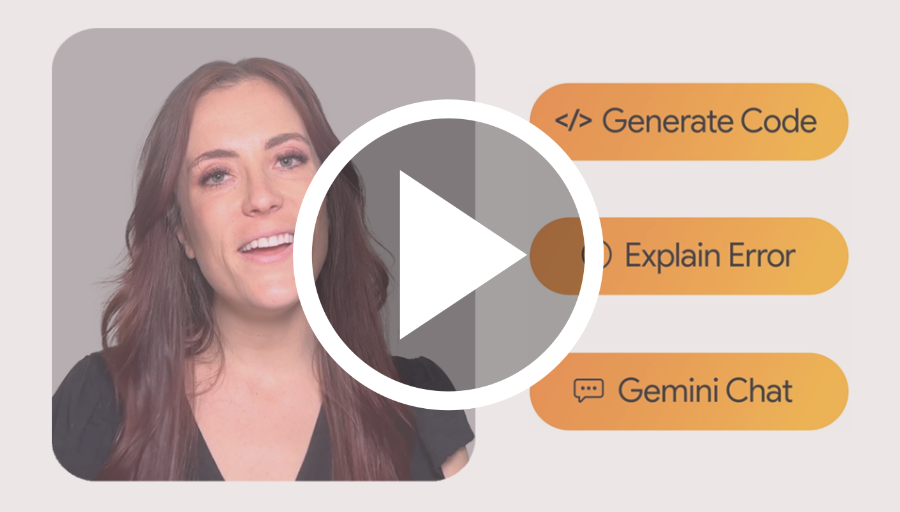
  </a>
</center>

In [6]:
pip install spiceypy


code for finding the time and position of mars.

In [5]:
from google.colab import drive
import spiceypy as spice
import os

# Mount Google Drive
drive.mount('/content/drive')

# Define kernel directory
kernel_dir = '/content/drive/MyDrive/'  # Replace with your kernel directory

# Clear any previously loaded kernels
spice.kclear()

# Load kernels
try:
    spice.furnsh(os.path.join(kernel_dir, "de430.bsp"))  # Planetary kernel
    spice.furnsh(os.path.join(kernel_dir, "naif0012.tls"))  # Leap seconds kernel
    print("Kernels loaded successfully.")
except Exception as e:
    print(f"Kernel loading failed: {e}")

# Verify loaded kernels
loaded_kernels = spice.ktotal("ALL")
print(f"Total kernels loaded: {loaded_kernels}")

# Time conversion
utc_time = "2025-01-22 13:00:00"
try:
    et = spice.str2et(utc_time)
    print(f"Ephemeris Time: {et}")
except Exception as e:
    print(f"Error converting time: {e}")
    spice.kclear()

# Verify kernel coverage for Mars
try:
    mars_id = spice.bodn2c("MARS")
    kernel_path = os.path.join(kernel_dir, "de430.bsp")
    coverage = spice.spkcov(kernel_path, mars_id)
    start_et, end_et = coverage[0], coverage[-1]
    print(f"Kernel coverage for Mars:")
    print(f"Start ET: {start_et} ({spice.etcal(start_et)})")
    print(f"End ET: {end_et} ({spice.etcal(end_et)})")

    if not (start_et <= et <= end_et):
        print("Error: The requested time is outside the kernel's coverage period.")
except Exception as e:
    print(f"Error checking kernel coverage: {e}")

# Compute position of Mars
try:
    target = "MARS"
    observer = "EARTH"
    reference_frame = "J2000"
    correction = "NONE"

    state, light_time = spice.spkgeo(
        targ=spice.bodn2c(target),
        et=et,
        ref=reference_frame,
        obs=spice.bodn2c(observer)
    )

    position_km = state[:3]
    velocity_kmps = state[3:]

    print(f"Position: X={position_km[0]:.2f}, Y={position_km[1]:.2f}, Z={position_km[2]:.2f} km")
    print(f"Velocity: VX={velocity_kmps[0]:.2f}, VY={velocity_kmps[1]:.2f}, VZ={velocity_kmps[2]:.2f} km/s")
except Exception as e:
    print(f"Error computing Mars position: {e}")

# Unload kernels
spice.kclear()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Kernels loaded successfully.
Total kernels loaded: 2
Ephemeris Time: 790822869.1845415
Error checking kernel coverage: SpiceCell index out of range
Error computing Mars position: 

Toolkit version: CSPICE_N0067

SPICE(SPKINSUFFDATA) --

Insufficient ephemeris data has been loaded to compute the state of 499 (MARS) relative to 399 (EARTH) at the ephemeris epoch 2025 JAN 22 13:01:09.184.

spkgeo_c --> SPKGEO



In [21]:
drive.mount('/content/drive')

Mounted at /content/drive


unfortunatly the file doesnt contain mars .spkcov data to find its position

In [4]:
import spiceypy as spice
import os

kernel_path = "/content/drive/MyDrive/de430.bsp"  # Update path if needed
mars_id = spice.bodn2c("MARS")

try:
    coverage = spice.spkcov(kernel_path, mars_id)
    if len(coverage) == 0:
        print("No coverage data found for Mars in the kernel.")
    else:
        start_et, end_et = coverage[0], coverage[-1]
        print(f"Kernel coverage for Mars:")
        print(f"Start ET: {start_et} ({spice.etcal(start_et)})")
        print(f"End ET: {end_et} ({spice.etcal(end_et)})")
except Exception as e:
    print(f"Error checking kernel coverage: {e}")


No coverage data found for Mars in the kernel.


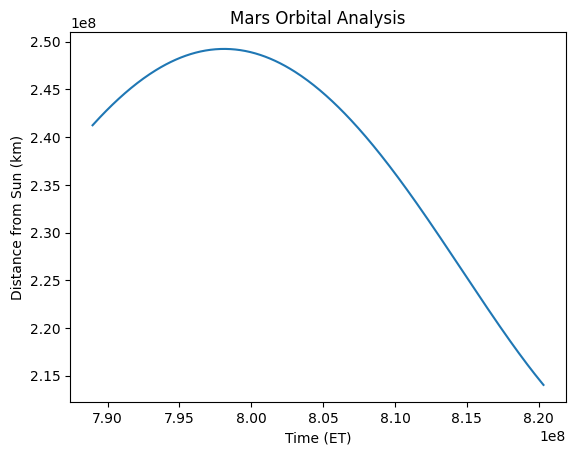

In [9]:
import spiceypy as spice
import matplotlib.pyplot as plt

# Load SPICE kernels
# Replace with the actual path to your kernel files
spice.furnsh("/content/drive/MyDrive/de430.bsp")
spice.furnsh("/content/drive/MyDrive/naif0012.tls")

# Define time range
start_time = "2025-01-01T00:00:00"
end_time = "2025-12-31T00:00:00"
step = 86400  # 1 day in seconds

# Convert start and end times to ET
et_start = spice.str2et(start_time)
et_end = spice.str2et(end_time)

# Compute positions
times = []
distances = []
current_time = et_start
while current_time <= et_end:
    # Use 4 for Mars barycenter instead of 499 (Mars)
    # The barycenter usually has wider coverage in the ephemeris
    state, _ = spice.spkgeo(targ=4, et=current_time, ref="ECLIPJ2000", obs=10)
    distances.append(spice.vnorm(state[:3]))  # Distance from Sun
    times.append(current_time)
    current_time += step

# Plot results
plt.plot(times, distances)
plt.xlabel("Time (ET)")
plt.ylabel("Distance from Sun (km)")
plt.title("Mars Orbital Analysis")
plt.show()

# Unload kernels
spice.kclear()

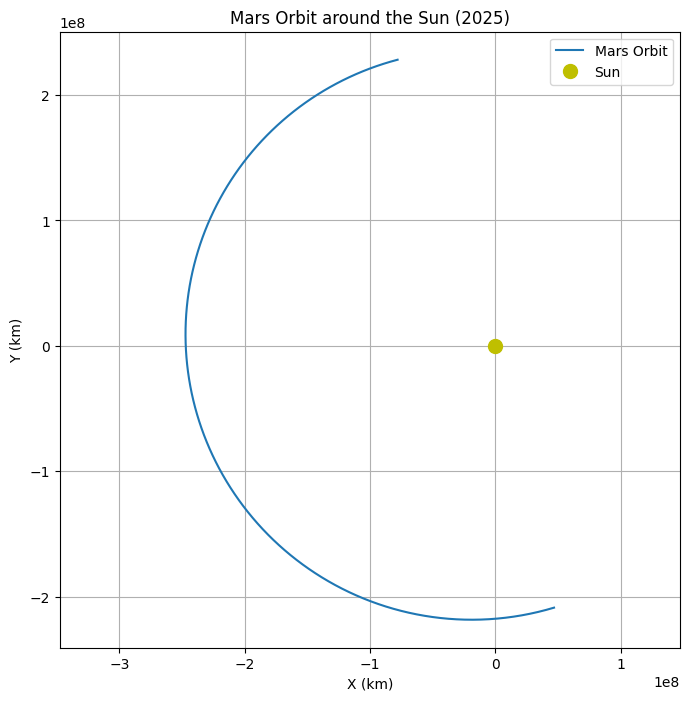

In [10]:
import spiceypy as spice
import matplotlib.pyplot as plt
import numpy as np

# Load SPICE kernels
spice.furnsh("/content/drive/MyDrive/de430.bsp")
spice.furnsh("/content/drive/MyDrive/naif0012.tls")

# Define time range
start_time = "2025-01-01T00:00:00"
end_time = "2025-12-31T00:00:00"
step = 86400  # 1 day in seconds

# Convert start and end times to ET
et_start = spice.str2et(start_time)
et_end = spice.str2et(end_time)

# Compute positions
times = []
x_positions = []
y_positions = []
current_time = et_start
while current_time <= et_end:
    # Get position of Mars relative to the Sun
    state, _ = spice.spkgeo(targ=4, et=current_time, ref="ECLIPJ2000", obs=10)

    # Extract x and y coordinates
    x_positions.append(state[0])
    y_positions.append(state[1])
    times.append(current_time)
    current_time += step

# Plot results
plt.figure(figsize=(8, 8))  # Adjust figure size if needed
plt.plot(x_positions, y_positions, label="Mars Orbit")
plt.plot(0, 0, 'yo', markersize=10, label="Sun")  # Plot the Sun at the center
plt.xlabel("X (km)")
plt.ylabel("Y (km)")
plt.title("Mars Orbit around the Sun (2025)")
plt.legend()
plt.grid(True)
plt.axis('equal')  # Ensure equal scaling for x and y axes
plt.show()

# Unload kernels
spice.kclear()

In [11]:
!pip install matplotlib

In [14]:
pip install matplotlib numpy pandas


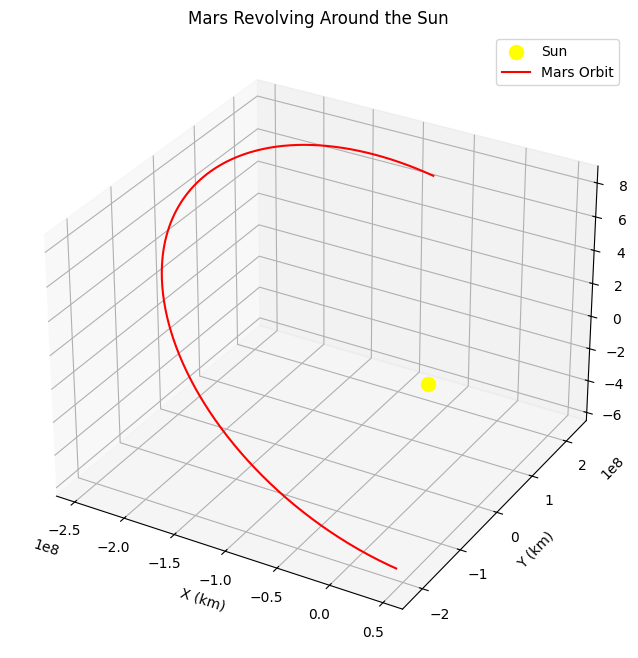

In [16]:


import spiceypy as spice
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Load SPICE kernels
spice.furnsh("/content/drive/MyDrive/de430.bsp")
spice.furnsh("/content/drive/MyDrive/naif0012.tls")

# Define time range
start_time = "2025-01-01T00:00:00"
end_time = "2025-12-31T00:00:00"
step = 86400  # 1 day in seconds

# Convert start and end times to ET
et_start = spice.str2et(start_time)
et_end = spice.str2et(end_time)

# Compute positions
times = []
x_positions = []
y_positions = []
z_positions = [] # Added for 3D plotting
current_time = et_start
while current_time <= et_end:
    # Get position of Mars relative to the Sun
    state, _ = spice.spkgeo(targ=4, et=current_time, ref="ECLIPJ2000", obs=10)

    # Extract x, y, and z coordinates
    x_positions.append(state[0])
    y_positions.append(state[1])
    z_positions.append(state[2]) # Added for 3D plotting
    times.append(current_time)
    current_time += step

# Create a Pandas DataFrame with position data
df = pd.DataFrame({'X': x_positions, 'Y': y_positions, 'Z': z_positions})

# Save the DataFrame to a CSV file
df.to_csv("mars_sun_position_data.csv", index=False)

# Load Mars position data from the generated CSV
file_path = "mars_sun_position_data.csv"
data = pd.read_csv(file_path)

# Extract X, Y, Z positions
x = data['X']
y = data['Y']
z = data['Z']

# Create 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the Sun
ax.scatter(0, 0, 0, color='yellow', s=100, label="Sun")

# Plot Mars's orbit
ax.plot(x, y, z, label="Mars Orbit", color='red')

# Set labels
ax.set_xlabel("X (km)")
ax.set_ylabel("Y (km)")
ax.set_zlabel("Z (km)")
ax.set_title("Mars Revolving Around the Sun")

# Add legend and show
ax.legend()
plt.show()

# Unload kernels
spice.kclear()

To execute the code in the above cell, select it with a click and then either press the play button to the left of the code, or use the keyboard shortcut "Command/Ctrl+Enter". To edit the code, just click the cell and start editing.

Variables that you define in one cell can later be used in other cells: